In [200]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

In [201]:
results = np.load("data/o3o4vZ/row_or_column/results.npy")[0]

results["big"]["b234"].vss



<Container({'b247': <type 'tuple'>, 'b248': <type 'tuple'>, 'b262': <type 'tuple'>, 'b263': <type 'tuple'>, 'b261': <type 'tuple'>, 'b264': <type 'tuple'>, 'b277': <type 'tuple'>, 'b278': <type 'tuple'>})>

In [202]:
SIZES = {
    "big": "Grd",
    "small": u"Peq",
    "mid": "Med"
}

rows = []
for size in ["small", "mid", "big"]:
    sdata = results[size]
    for train, tdata in sorted(sdata.items()):
        row = {
            "Muestra": SIZES[size],
            "Entr.": train, 
            (train, "prec"): tdata.kfold[0], 
            (train, "rec"): tdata.kfold[1]}
        for k, v in sorted(tdata.vss.items()):
            row.update({(k, "prec"): v[0], (k, "rec"): v[1]})
        rows.append(row)
        

def hl_kfold(row):
    test = row.name[-1]
    styles = []
    for k, v in row.iteritems():
        styles.append(
            'background-color: lightgrey'
            if k[0] == test else
            "")
    return styles

In [203]:
raw = pd.DataFrame(rows).set_index(["Muestra", "Entr."])
raw.columns = pd.MultiIndex.from_tuples(df.columns.values)
raw.to_csv("data/o3o4vZ/row_or_column/raw.csv", encoding='utf-8')
raw.to_pickle("data/o3o4vZ/row_or_column/raw.pkl")

with pd.option_context('display.precision', 4):
    html = raw.style.apply(hl_kfold, axis=1)
html

In [204]:
def norm_kfold(row):
    test = row.name[-1]
    denom = {
        "prec": row[(test, "prec")],
        "rec": row[(test, "rec")]}
    empty = {}
    for k, v in row.iteritems():
        d = denom[k[1]]
        empty[k] = v / d
    return empty
    
norm = raw.apply(norm_kfold, axis=1)
norm.to_csv("data/o3o4vZ/row_or_column/norm.csv", encoding='utf-8')
norm.to_pickle("data/o3o4vZ/row_or_column/norm.pkl")

with pd.option_context('display.precision', 4):
    html = norm.style.apply(hl_kfold, axis=1)
html

## Todas las muestras

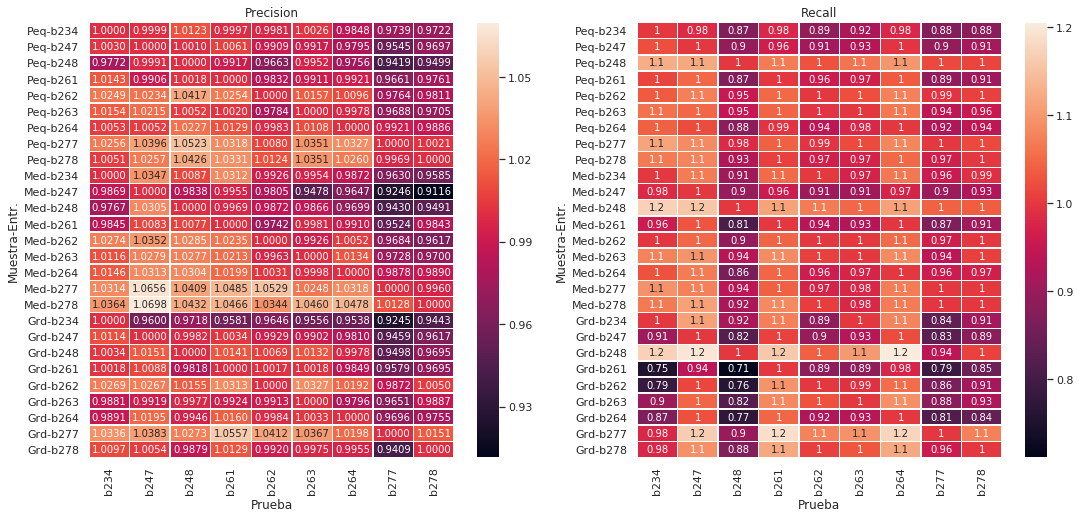

In [277]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

df = norm

sns.heatmap(df.swaplevel(0, 1, axis=1)[["prec"]], annot=True, fmt='.4f',  linewidths=.5, ax=ax[0]);

sns.heatmap(df.swaplevel(0, 1, axis=1)[["rec"]], annot=True, linewidths=.5, ax=ax[1]);

labels = [l.get_text().split("-", 1)[-1] for l in ax[0].get_xticklabels()]
ax[0].set_xticklabels(labels)
ax[1].set_xticklabels(labels)

ax[0].set_title("Precision")
ax[1].set_title("Recall")

ax[0].set_xlabel("Prueba")
ax[1].set_xlabel("Prueba")

plt.show()

## Muestra Pequeña (2500)

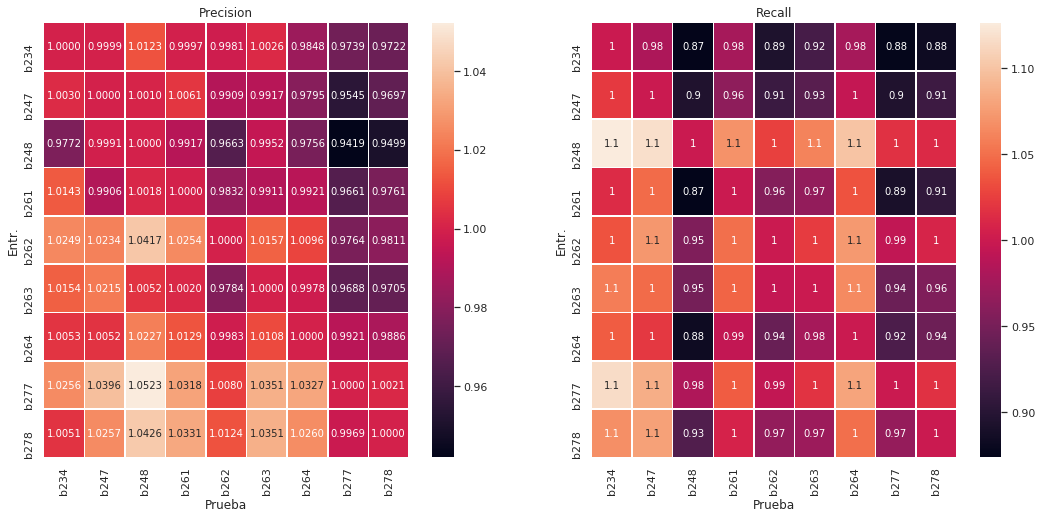

In [278]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

df = norm.loc["Peq"]

sns.heatmap(df.swaplevel(0, 1, axis=1)[["prec"]], annot=True, fmt='.4f',  linewidths=.5, ax=ax[0]);

sns.heatmap(df.swaplevel(0, 1, axis=1)[["rec"]], annot=True, linewidths=.5, ax=ax[1]);

labels = [l.get_text().split("-", 1)[-1] for l in ax[0].get_xticklabels()]
ax[0].set_xticklabels(labels)
ax[1].set_xticklabels(labels)

ax[0].set_title("Precision")
ax[1].set_title("Recall")

ax[0].set_xlabel("Prueba")
ax[1].set_xlabel("Prueba")

plt.show()

## Muestra Mediana (5000)

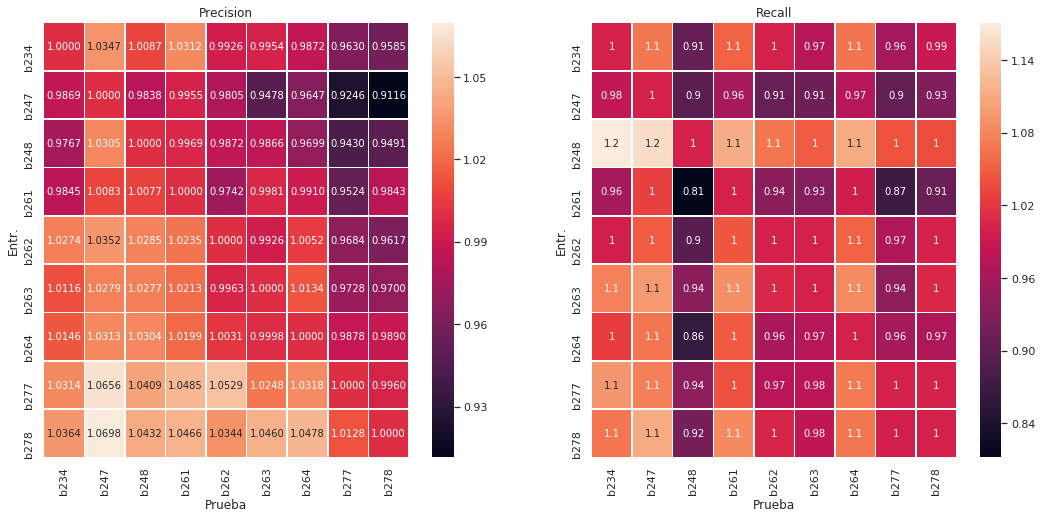

In [281]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

df = norm.loc["Med"]

sns.heatmap(df.swaplevel(0, 1, axis=1)[["prec"]], annot=True, fmt='.4f',  linewidths=.5, ax=ax[0]);

sns.heatmap(df.swaplevel(0, 1, axis=1)[["rec"]], annot=True, linewidths=.5, ax=ax[1]);

labels = [l.get_text().split("-", 1)[-1] for l in ax[0].get_xticklabels()]
ax[0].set_xticklabels(labels)
ax[1].set_xticklabels(labels)

ax[0].set_title("Precision")
ax[1].set_title("Recall")

ax[0].set_xlabel("Prueba")
ax[1].set_xlabel("Prueba")

plt.show()

## Muestra Grande (20K)

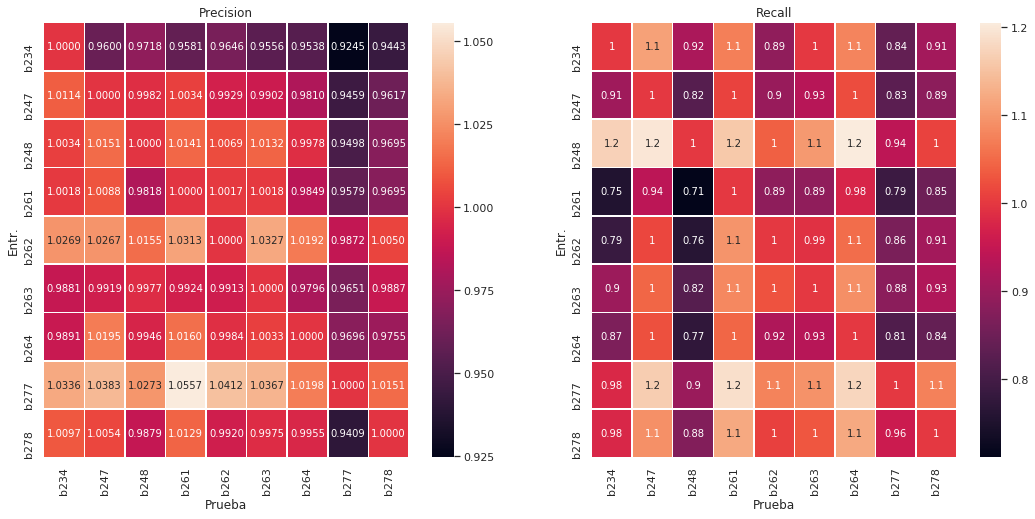

In [282]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

df = norm.loc["Grd"]

sns.heatmap(df.swaplevel(0, 1, axis=1)[["prec"]], annot=True, fmt='.4f',  linewidths=.5, ax=ax[0]);

sns.heatmap(df.swaplevel(0, 1, axis=1)[["rec"]], annot=True, linewidths=.5, ax=ax[1]);

labels = [l.get_text().split("-", 1)[-1] for l in ax[0].get_xticklabels()]
ax[0].set_xticklabels(labels)
ax[1].set_xticklabels(labels)

ax[0].set_title("Precision")
ax[1].set_title("Recall")

ax[0].set_xlabel("Prueba")
ax[1].set_xlabel("Prueba")

plt.show()